In [13]:
import pandas as pd
from collections import Counter
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
import math
from matplotlib import pyplot

### Load training data

In [14]:
Bot_train = pd.read_csv('Train_test_data/Bot_train.csv', sep=',')

WebAttack_train = pd.read_csv('Train_test_data/WebAttack_train.csv', sep=',') 

Brute_Force_train = pd.read_csv('Train_test_data/Brute_Force_train.csv', sep=',') 

Dos_train = pd.read_csv('Train_test_data/Dos_train.csv', sep=',')

### SMOTE

In [15]:
oversample = SMOTE()

bot_smote, y = oversample.fit_resample(Bot_train, Bot_train[' Label'])
counter = Counter(y)
print(counter)

WebAttack_smote, y = oversample.fit_resample(WebAttack_train, WebAttack_train[' Label'])
counter = Counter(y)
print(counter)

Brute_Force_smote, y = oversample.fit_resample(Brute_Force_train, Brute_Force_train[' Label'])
counter = Counter(y)
print(counter)

Dos_smote, y = oversample.fit_resample(Dos_train, Dos_train[' Label'])
#counter = Counter(y)
#print(counter)

Counter({0.0: 111996, 1.0: 111996})


### SMOTE data generated SHUFFLE

In [16]:
bot_smote = shuffle(bot_smote)
WebAttack_smote  = shuffle(WebAttack_smote)
Brute_Force_smote  = shuffle(Brute_Force_smote)
Dos_smote = shuffle(Dos_smote)

### Save SMOTE generated data in csv files

In [10]:
bot_smote.to_csv(r'SMOTE_Balanced_Data/Botnet_smote_train.csv', index = False)
WebAttack_smote.to_csv(r'SMOTE_Balanced_Data/WebAttack_smote_train.csv', index = False)
Brute_Force_smote.to_csv(r'SMOTE_Balanced_Data/Brute_Force_smote_train.csv', index = False)
Dos_smote.to_csv(r'SMOTE_Balanced_Data/Dos_smote_train.csv', index = False)

### Calculate the Euclidean Distance between the SMOTE generated data and the real data 

Euclidean Distance of  Source Port: 0.0007099405374950042


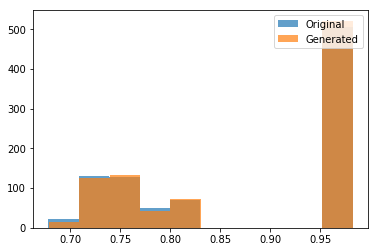

Euclidean Distance of  Protocol: 0.0


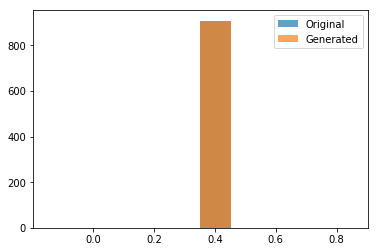

Euclidean Distance of Total Length of Fwd Packets: 0.001288963140966206


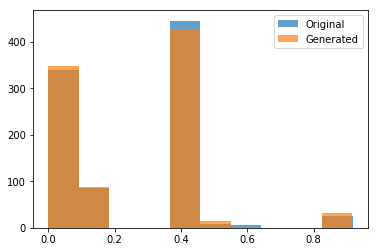

Euclidean Distance of  Fwd Packet Length Min: 3.889114112470425e-06


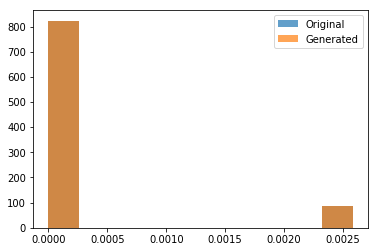

Euclidean Distance of Flow Bytes/s: 0.0007096108524639006


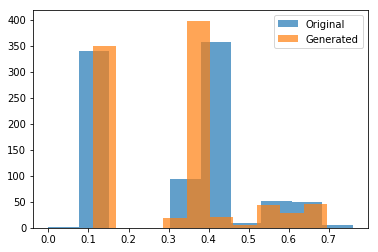

Euclidean Distance of  Flow Packets/s: 0.0005883852666526922


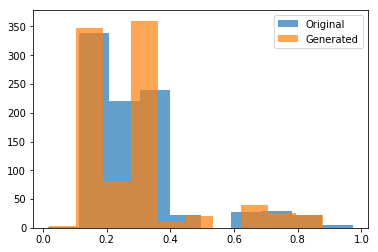

Euclidean Distance of  Fwd IAT Max: 0.0006786016351517859


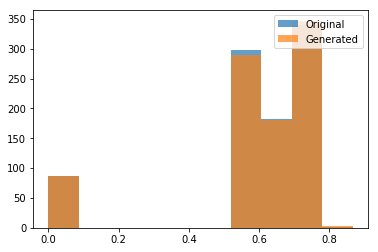

Euclidean Distance of  Fwd IAT Min: 0.001231751720742539


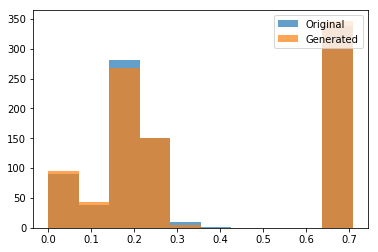

Euclidean Distance of Bwd IAT Total: 0.0007238670344821398


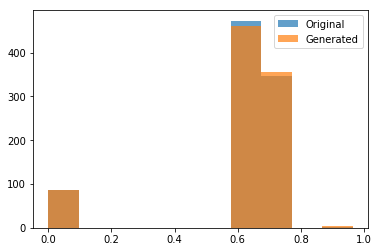

Euclidean Distance of Fwd PSH Flags: 0.0


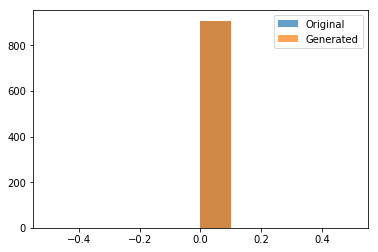

Euclidean Distance of  Fwd Header Length: 0.0003417733342941297


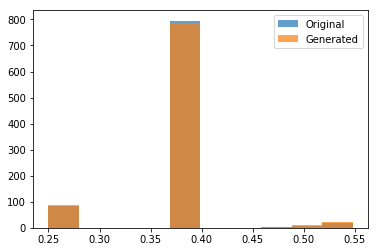

Euclidean Distance of  Bwd Packets/s: 0.0006020613567917335


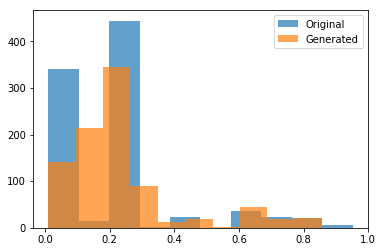

Euclidean Distance of FIN Flag Count: 0.0


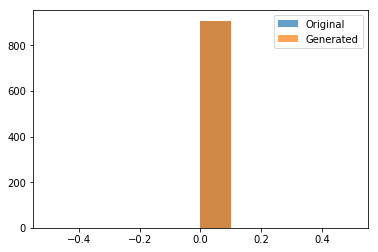

Euclidean Distance of  RST Flag Count: 0.0


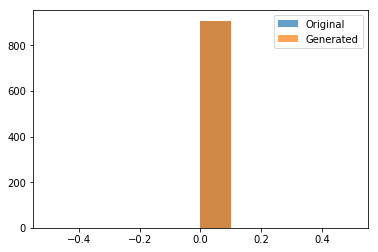

Euclidean Distance of  ACK Flag Count: 0.0011013215859030838


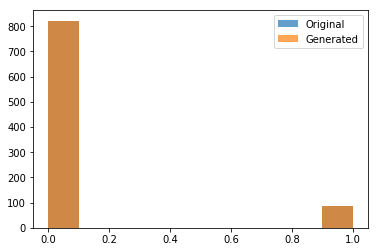

Euclidean Distance of  URG Flag Count: 0.0011013215859030838


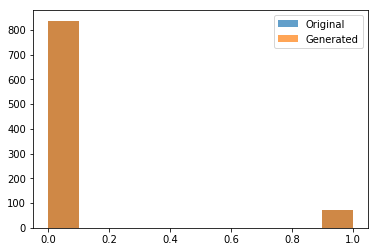

Euclidean Distance of  Down/Up Ratio: 0.0005745796030055063


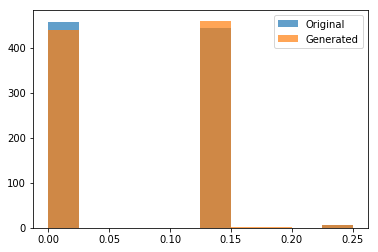

Euclidean Distance of  Avg Bwd Segment Size: 3.6573511823055594e-05


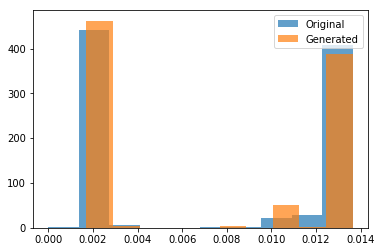

Euclidean Distance of  act_data_pkt_fwd: 1.1657507718370942e-05


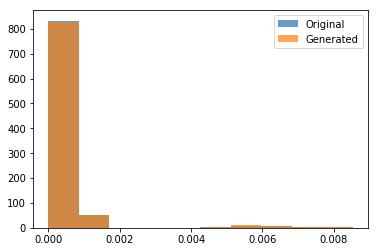

Euclidean Distance of  min_seg_size_forward: 0.0004722513929481555


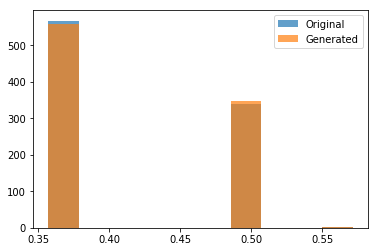

Euclidean Distance of Active Mean: 0.0006561489623782567


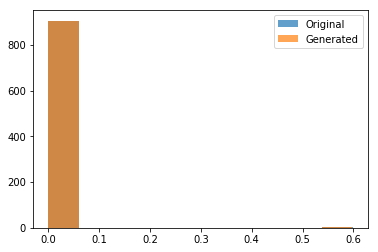

Euclidean Distance of  Active Std: 0.000619807327437053


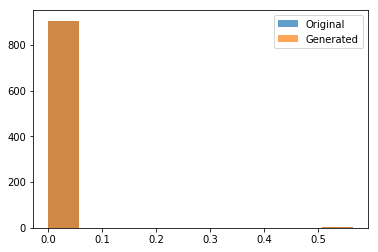

Euclidean Distance of  Idle Std: 0.0005838275462696473


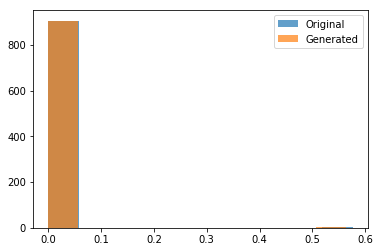

Euclidean Distance of  Label: 0.0


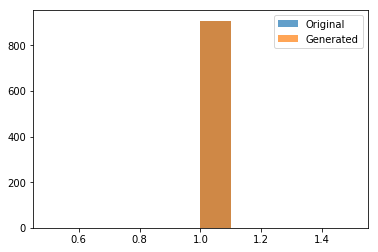

In [17]:
#Choose the data to measure
ORIGINAL = Bot_train
GENERATED = bot_smote

#Choose the label class to measure
ORIGINAL_CLASS = ORIGINAL[' Label']==1
GENERATED_CLASS = GENERATED[' Label']==1


ORIGINAL_DATA = ORIGINAL[ORIGINAL_CLASS]
NUMBER_ROWS = len(ORIGINAL_DATA)
GENERATED_DATA = GENERATED[GENERATED_CLASS]
GENERATED_DATA = GENERATED_DATA[:NUMBER_ROWS]


for feature in ORIGINAL_DATA.columns:
    array = [value for value in ORIGINAL_DATA[feature]]
    temp =  [value for value in GENERATED_DATA[feature]]
    
    array.sort()
    temp.sort()
   
    x=tuple(array)
    y= tuple(temp)

    distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
    euclidean_distance = distance/NUMBER_ROWS

    print('Euclidean Distance of ' + feature + ': ' + str(euclidean_distance))
    pyplot.figure()
    pyplot.hist(array, alpha=0.7, label='Original')
    pyplot.hist(temp, alpha=0.7, label='Generated')
    pyplot.legend(loc='upper right')
    pyplot.show()